**Overfitting and Underfitting in Machine Learning**

# Introduction

In this notebook, we explore two important concepts in Machine Learning: **Overfitting** and **Underfitting**.

Both are related to the performance of ML models on training and test data.

Understanding and identifying these issues is essential for building accurate, generalizable models.


# What is Underfitting?
**Underfitting** occurs when a model is too simple to capture the patterns in the training data.

- Low accuracy on training data
- Low accuracy on test data
- Model is not learning enough



## Example of Underfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Sample dataset (non-linear)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

In [3]:
# Underfitting: using a very simple linear model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

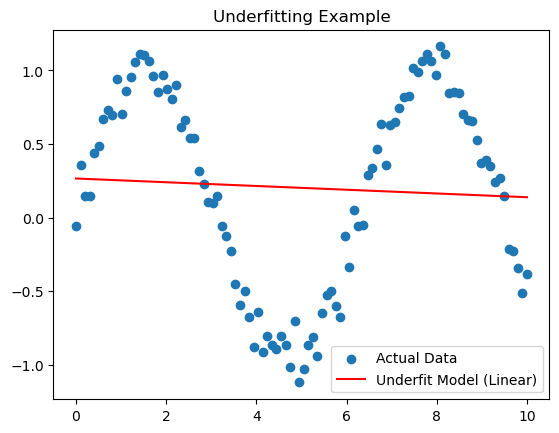

In [4]:
plt.scatter(X, y, label="Actual Data")
plt.plot(X, y_pred, color="red", label="Underfit Model (Linear)")
plt.title("Underfitting Example")
plt.legend()
plt.show()

In [5]:
print("MSE:", mean_squared_error(y, y_pred))

MSE: 0.44579632914556155


# What is Overfitting?
**Overfitting** occurs when a model is too complex and learns both the data and noise.

- Very high accuracy on training data
- Poor accuracy on test data
- Model memorizes instead of generalizing


## Example of Overfitting with Polynomial Regression

In [6]:
# Use Polynomial Features (high degree = overfitting)
poly = PolynomialFeatures(degree=15)
X_poly = poly.fit_transform(X)

In [7]:
# Overfit model
model_overfit = LinearRegression()
model_overfit.fit(X_poly, y)
y_overfit = model_overfit.predict(X_poly)

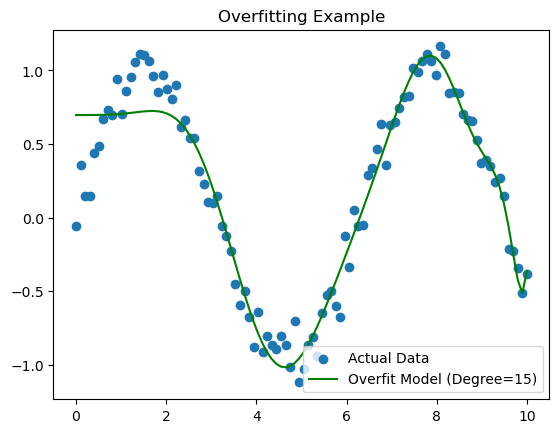

In [8]:
plt.scatter(X, y, label="Actual Data")
plt.plot(X, y_overfit, color="green", label="Overfit Model (Degree=15)")
plt.title("Overfitting Example")
plt.legend()
plt.show()

# A Good Fit (Balanced Model)

In [9]:
# Reasonable degree = good generalization
poly_good = PolynomialFeatures(degree=3)
X_poly_good = poly_good.fit_transform(X)

In [10]:
model_good = LinearRegression()
model_good.fit(X_poly_good, y)
y_good = model_good.predict(X_poly_good)

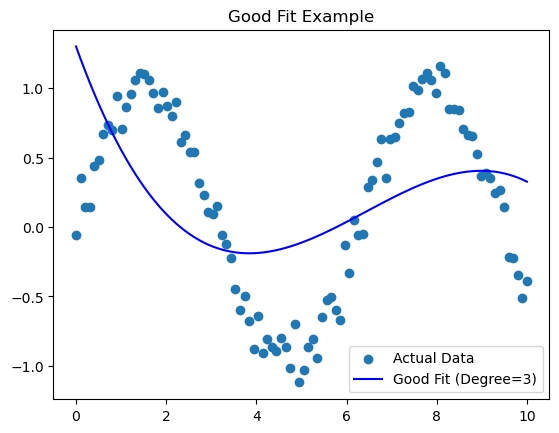

In [11]:
plt.scatter(X, y, label="Actual Data")
plt.plot(X, y_good, color="blue", label="Good Fit (Degree=3)")
plt.title("Good Fit Example")
plt.legend()
plt.show()

In [12]:
print("MSE (Good Fit):", mean_squared_error(y, y_good))

MSE (Good Fit): 0.33770615037449436


# How to Detect Overfitting or Underfitting?
Compare model performance:

| Condition         | Training Accuracy | Test Accuracy | Reason         |
|------------------|-------------------|---------------|----------------|
| Underfitting     | Low               | Low           | Too simple     |
| Overfitting      | High              | Low           | Too complex    |
| Good Fit         | High              | High          | Generalizes well |



# How to Avoid Overfitting?

- Use simpler models (reduce complexity)
- Collect more training data
- Use cross-validation
- Regularization (e.g., L1, L2)
- Pruning in decision trees
- Dropout in neural networks


# Key Takeaways

- Underfitting = model is too simple → misses important patterns.
- Overfitting = model is too complex → memorizes noise.
- Always balance the model to generalize well on unseen data.
- Use training/validation/test split and metrics like MSE or accuracy to evaluate fit.
